<a href="https://colab.research.google.com/github/sammyjojo9/Recommendation-system/blob/master/Recommend_Posts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:

posts=pd.read_csv('/content/drive/My Drive/data/intern/Mldata/posts.csv')
users=pd.read_csv('/content/drive/My Drive/data/intern/Mldata/users.csv')
views=pd.read_csv('/content/drive/My Drive/data/intern/Mldata/views.csv')


In [0]:
users=users.rename(index=str,columns={"_id":"user_id"})
posts=posts.rename(index=str,columns={"_id":"post_id"})
df = posts.copy()

CONTENT BASED **FILTERING**

In [0]:
df['index'] = df.index

In [6]:
df.head()

,post_id,title,category,post_type,index
0,5d62abaa65218653a132c956,hello there,Plant Biotechnology,blog,0
1,5d6d39567fa40e1417a4931c,Ml and AI,Artificial Intelligence|Machine Learning|Infor...,blog,1
2,5d7d23315720533e15c3b1ee,What is an Operating System ?,Operating Systems,blog,2
3,5d7d405e5720533e15c3b1f3,Lord Shiva,Drawings,artwork,3
4,5d80dfbc6c53455f896e600e,How Competition law evolved?,Competition Laws,blog,4


In [0]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
features = ['category',' post_type','title']
def combine_features(row):
    return row['category']+" "+row[' post_type']+" "+row['title']

In [0]:
for feature in features:
  df[feature] = df[feature].fillna('') #filling all NaNs with blank string



In [0]:
df["combined_features"] = df.apply(combine_features,axis=1) 

In [10]:
df.iloc[0].combined_features

'Plant Biotechnology blog hello there'

In [0]:

cv = CountVectorizer() #creating new CountVectorizer() object
count_matrix = cv.fit_transform(df["combined_features"]) #feeding combined strings(movie contents) to CountVectorizer() object

In [0]:
cosine_sim = cosine_similarity(count_matrix)

In [0]:
def get_index_from_title(title):
    return df[df['title']==title].index.values.astype(int)[0]

In [14]:
user_view_id = '5d7d405e5720533e15c3b1f3'
user_viewd = df.loc[df['post_id'] == user_view_id, 'title'].iloc[0]
post_index = get_index_from_title(user_viewd)
print(post_index)
#similar_post = list(enumerate(cosine_sim[post_index])) #accessing the row corresponding to given movie to find all the similarity scores for that movie and then enumerating over it

3


In [0]:
similar_post = list(enumerate(cosine_sim[post_index])) #accessing the row corresponding to given movie to find all the similarity scores for that movie and then enumerating over it

In [0]:
sorted_similar_posts = sorted(similar_post,key=lambda x:x[1],reverse=True)[1:]

In [17]:
i=0
print(" 5 similar posts to "+user_viewd+" are:\n")
for element in sorted_similar_posts:
    print(df['title'][element[0]]+'_________________category   --------> '+df['category'][element[0]]+'_________TYPE--------->'+df[' post_type'][element[0]])
    print()
    i=i+1
    if i>5:
        break

 5 similar posts to Lord Shiva are:

Lord shiva_________________category   --------> Drawings_________TYPE--------->artwork

Shiva Portrait_________________category   --------> Drawings_________TYPE--------->artwork

Lord shiva (Shadow Drawing)_________________category   --------> Drawings|Artistic design_________TYPE--------->artwork

Trident_________________category   --------> Drawings_________TYPE--------->artwork

Spartan_________________category   --------> Drawings_________TYPE--------->artwork

OM_________________category   --------> Drawings_________TYPE--------->artwork



Collaborative Filtering Using KNN

In [18]:
df=pd.merge(views,posts,on="post_id")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1447 entries, 0 to 1446
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     1447 non-null   object
 1   post_id     1447 non-null   object
 2   timestamp   1447 non-null   object
 3   title       1447 non-null   object
 4   category    1359 non-null   object
 5    post_type  1447 non-null   object
dtypes: object(6)
memory usage: 79.1+ KB


In [19]:
views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    1449 non-null   object
 1   post_id    1449 non-null   object
 2   timestamp  1449 non-null   object
dtypes: object(3)
memory usage: 34.1+ KB


In [20]:
views=views.drop('timestamp',1)
views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  1449 non-null   object
 1   post_id  1449 non-null   object
dtypes: object(2)
memory usage: 22.8+ KB


In [21]:
views.head()

,user_id,post_id
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e
1,5ed3748576027d35905ccaab,5ed4cbadbd514d602c1531a6
2,5ed0defa76027d35905cc2de,5eac305f10426255a7aa9dd3
3,5ed0defa76027d35905cc2de,5ed1ff0276027d35905cc60d
4,5ed0defa76027d35905cc2de,5ed3820f76027d35905ccac8


In [22]:
views .groupby('post_id')['user_id'].count().sort_values(ascending=False).head(10)

post_id
5ec1fd0974f7660d73aa0fd5    18
5ecd5d417023451e662235c5    16
5ecc1d4eeaff6b0c3a58a565    14
5ecce8a5eaff6b0c3a58a5e9    14
5eb2c11210426255a7aaa052    14
5ec2215374f7660d73aa1011    13
5ed09ad076027d35905cc15f    13
5ec7a8bdec493f4a26558846    12
5ed1ff0276027d35905cc60d    12
5ec57acaf2781131cc7e51d5    12
Name: user_id, dtype: int64

In [0]:
dfv = pd.DataFrame(views.groupby('post_id')['user_id'].count())
dfv = dfv.rename(index=str,columns={"user_id":"views"})


In [28]:
dfv['views'].sort_values(ascending=False).head()

post_id
5ec1fd0974f7660d73aa0fd5    18
5ecd5d417023451e662235c5    16
5ecc1d4eeaff6b0c3a58a565    14
5ecce8a5eaff6b0c3a58a5e9    14
5eb2c11210426255a7aaa052    14
Name: views, dtype: int64

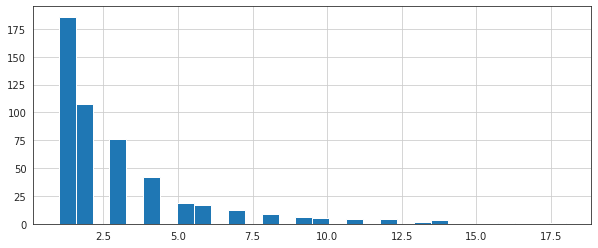

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('white')
%matplotlib inline
plt.figure(figsize=(10,4))
dfv['views'].hist(bins=30)

In [26]:
views.head()

,user_id,post_id
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e
1,5ed3748576027d35905ccaab,5ed4cbadbd514d602c1531a6
2,5ed0defa76027d35905cc2de,5eac305f10426255a7aa9dd3
3,5ed0defa76027d35905cc2de,5ed1ff0276027d35905cc60d
4,5ed0defa76027d35905cc2de,5ed3820f76027d35905ccac8


In [0]:
from scipy.sparse import csr_matrix
# pivot ratings into movie features
views['value'] = 1
user_features = views.pivot_table(index='post_id',columns='user_id',values='value').fillna(0)


In [0]:
mat_user_features = csr_matrix(user_features.values)

In [34]:
user_features.head()

user_id,5d60098a653a331687083238,5d610ae1653a331687083239,5d618359fc5fcf3bdd9a0910,5d6d2bb87fa40e1417a49315,5d7c994d5720533e15c3b1e9,5d90fc1a641ef364939fb6cc,5d9a2982979d5962253c2f81,5de50d768eab6401affbb135,5ded443342a8854bf6eaba9a,5deeef6142a8854bf6eabab9,5defd51362624b0135ea9fd2,5df11ee1ee4bb5252b4f5344,5df20f1fee4bb5252b4f5351,5df24eeaee4bb5252b4f5366,5df3f8f2ee4bb5252b4f5393,5df49b32cc709107827fb3c7,5e0d5ce12a37d20505da2a5d,5e1ef04c2a37d20505da2b8b,5e26bb482a37d20505da2c10,5e3563348d344822fed4d13a,5e35a5ed8d344822fed4d13e,5e365e758d344822fed4d144,5e37b16ceab55d319938a6f8,5e4195c3eab55d319938a82c,5e4ce251f5561b1994c8e40d,5e5855ced701ab08af792b51,5e5af599d701ab08af792b63,5e5b4511d701ab08af792b6d,5e5dfbbefbc8805f69e02c91,5e783375cfc8b713f5ac7c5b,5e78ce84cfc8b713f5ac7cee,5e7b30a6cfc8b713f5ac7d95,5e7cf05bcfc8b713f5ac7db7,5e7dde87a3258347b42f2108,5e7de336a3258347b42f210e,5e7def80a3258347b42f2124,5e7f4ad1a3258347b42f2155,5e822b86a3258347b42f2360,5e8309c4a3258347b42f23f4,5e840a75a3258347b42f2437,...,5eb4f73910426255a7aaa0cc,5eb508ae10426255a7aaa12c,5eb7aeccfd92f539c465ddd7,5ebc2ec4514aab59896bcc84,5ebcf2f2514aab59896bcd00,5ec11abc74f7660d73aa0fbd,5ec2204374f7660d73aa100f,5ec3ba5374f7660d73aa1201,5ec553e2f2781131cc7e5138,5ecb979eeaff6b0c3a58a4f0,5ecd5a5c7023451e662235c1,5ecdf7397023451e66223784,5ece02427023451e66223861,5ecf6e6576027d35905cbeec,5ecfa94676027d35905cbf78,5ecfaa0076027d35905cbf83,5ecfbcb376027d35905cbfe5,5ecfdaa976027d35905cc02c,5ed09e8576027d35905cc164,5ed0bfc176027d35905cc1f8,5ed0cfc676027d35905cc26a,5ed0d9bc76027d35905cc2c2,5ed0defa76027d35905cc2de,5ed0dfec76027d35905cc2ec,5ed0fc0976027d35905cc448,5ed12ae476027d35905cc4a1,5ed13bb076027d35905cc4ba,5ed142cd76027d35905cc4cd,5ed232b976027d35905cc689,5ed237ee76027d35905cc6c5,5ed2399b76027d35905cc70f,5ed24d5a76027d35905cc7d7,5ed2672576027d35905cc7f6,5ed2edf176027d35905cc961,5ed350ed76027d35905cca2c,5ed35aa376027d35905cca67,5ed3737976027d35905ccaa2,5ed3748576027d35905ccaab,5ed3cbcbbd514d602c1530a7,5ed3e898bd514d602c1530de
post_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5d62abaa65218653a132c956,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5d6d39567fa40e1417a4931c,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5d7d23315720533e15c3b1ee,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5d7d405e5720533e15c3b1f3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5d80dfbc6c53455f896e600e,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

In [36]:
num_users = len(views.user_id.unique())
num_posts = len(views.post_id.unique())
print('There are {} unique users and {} unique movies in this data set'.format(num_users, num_posts))

There are 118 unique users and 495 unique movies in this data set


In [37]:
model_knn.fit(mat_user_features)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                 radius=1.0)

In [41]:
query_index = np.random.choice(user_features.shape[0])
distances,indices = model_knn.kneighbors(user_features.iloc[query_index,:].values.reshape(1,-1),n_neighbors=5)
for i in range(0,len(distances.flatten())):
  if i==0:
    print('Recommendation for {0}:\n'.format(user_features.index[query_index]))
  else:
    print('{0}:{1}, distace :{2}:'.format(i,user_features.index[indices.flatten()[i]],distances.flatten()[i]))



Recommendation for 5e7f39a3a3258347b42f2151:

1:5eb4fbe910426255a7aaa105, distace :0.42264973081037427:
2:5e88383aa3258347b42f255c, distace :0.42264973081037427:
3:5eabeec210426255a7aa9cd2, distace :0.42264973081037427:
4:5eaf8b9310426255a7aa9f7e, distace :0.5:
